## Understanding and Enhancing Health Camp Engagement

**Problem Statement for Data Analytics: 
<br> Understanding and Enhancing Health Camp Engagement**

**Background:**
Health camps play a crucial role in community healthcare, providing services and information to individuals. To optimize the impact of these camps, it is essential to analyze the available data comprehensively. The dataset provided includes information on health camp details, patient profiles, registrations, and attendance records.

**Objective:**
The primary objective of this data analytics project is to gain insights into health camp engagement and identify factors that contribute to positive outcomes without necessarily building a predictive model. The focus is on understanding patterns and trends within the data to inform strategies for enhancing community participation in health camps.


In [1]:
# Required Libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

NOTE - This project only covers analysis on understanding and camp engagement in healthcare

In [2]:
# Read the required dataset for problem statement
# Comment for not used dataset if needed you just remove the comment

# data_dictionary = pd.read_excel(r"D:\EDA\Healthcare Analytics Project\Datasets\Train\Data_Dictionary.xlsx")
first_health_camp = pd.read_csv(r"D:\EDA\Healthcare Analytics Project\Datasets\Train\First_Health_Camp_Attended.csv")
second_health_camp = pd.read_csv(r"D:\EDA\Healthcare Analytics Project\Datasets\Train\Second_Health_Camp_Attended.csv")
third_health_camp = pd.read_csv(r"D:\EDA\Healthcare Analytics Project\Datasets\Train\Third_Health_Camp_Attended.csv")
health_camp_details = pd.read_csv(r"D:\EDA\Healthcare Analytics Project\Datasets\Train\Health_Camp_Detail.csv")
# patient_profiles = pd.read_csv(r"D:\EDA\Healthcare Analytics Project\Datasets\Train\Patient_Profile.csv")
# test_data= pd.read_csv(r"D:\EDA\Healthcare Analytics Project\Datasets\Train\test.csv")
# train_data= pd.read_csv(r"D:\EDA\Healthcare Analytics Project\Datasets\Train\Train.csv")

In [3]:
health_camp_details.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2
2,6544,03-Nov-03,15-Nov-03,First,F,1
3,6585,22-Nov-03,05-Dec-03,First,E,2
4,6561,30-Nov-03,18-Dec-03,First,E,1


In [4]:
health_camp_details.shape

(65, 6)

I does not consider the health camp details for analysis because of less number of records.Suppose you are consider this data, you should perform feature engineering and move to deep analysis.

### According to the problem statement we need to focus on health camp first

In [5]:
first_health_camp.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN
2,518680,6560,10,0.048780,NaN
3,509916,6560,30,0.634146,NaN
4,488006,6560,20,0.024390,NaN


In [6]:
second_health_camp.head()

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712


In [7]:
third_health_camp.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,510954,6528,2,2


In [8]:
first_health_camp.shape

(6218, 5)

In [9]:
second_health_camp.shape

(7819, 3)

In [10]:
third_health_camp.shape

(6515, 4)

### Merge the data for Analysis

In [11]:
# Merge the DataFrames using outer join
merged_df = pd.merge(first_health_camp,second_health_camp, on='Patient_ID', how='outer', suffixes=('_A', '_B'))
merged_df = pd.merge(merged_df,third_health_camp, on='Patient_ID', how='outer')

In [12]:
merged_df.rename(columns={'Health_Camp_ID': 'Health_Camp_ID_C'}, inplace=True)

In [13]:
merged_df.head()

,Patient_ID,Health_Camp_ID_A,Donation,Health_Score,Unnamed: 4,Health_Camp_ID_B,Health Score,Health_Camp_ID_C,Number_of_stall_visited,Last_Stall_Visited_Number
0,506181,6560.0,40.0,0.439024,NaN,6529.0,0.691194,NaN,NaN,NaN
1,494977,6560.0,20.0,0.097561,NaN,6536.0,0.673181,6578.0,5.0,3.0
2,494977,6560.0,20.0,0.097561,NaN,6536.0,0.673181,6527.0,2.0,1.0
3,494977,6560.0,20.0,0.097561,NaN,6555.0,0.615827,6578.0,5.0,3.0
4,494977,6560.0,20.0,0.097561,NaN,6555.0,0.615827,6527.0,2.0,1.0


### Filling Nan Values

In [14]:
merged_df.fillna(0,inplace=True)

In [15]:
merged_df.isnull().sum()

Patient_ID                   0
Health_Camp_ID_A             0
Donation                     0
Health_Score                 0
Unnamed: 4                   0
Health_Camp_ID_B             0
Health Score                 0
Health_Camp_ID_C             0
Number_of_stall_visited      0
Last_Stall_Visited_Number    0
dtype: int64

In [16]:
merged_df['Unnamed: 4'].unique() # Unnamed:4 feature all values are zero so drop this particular feature

array([0.])

In [17]:
# Drop th Unnamed:4 column
merged_df.drop('Unnamed: 4',axis = 1,inplace=True)

In [18]:
merged_df.head()

,Patient_ID,Health_Camp_ID_A,Donation,Health_Score,Health_Camp_ID_B,Health Score,Health_Camp_ID_C,Number_of_stall_visited,Last_Stall_Visited_Number
0,506181,6560.0,40.0,0.439024,6529.0,0.691194,0.0,0.0,0.0
1,494977,6560.0,20.0,0.097561,6536.0,0.673181,6578.0,5.0,3.0
2,494977,6560.0,20.0,0.097561,6536.0,0.673181,6527.0,2.0,1.0
3,494977,6560.0,20.0,0.097561,6555.0,0.615827,6578.0,5.0,3.0
4,494977,6560.0,20.0,0.097561,6555.0,0.615827,6527.0,2.0,1.0


In [19]:
merged_df.shape

(19771, 9)

## 1.Perform Data Cleaning

In [20]:
# Drop rows where all numerical values are zero
merged_df = merged_df[(merged_df[['Donation', 'Health_Score', 'Number_of_stall_visited','Last_Stall_Visited_Number']] != 0).any(axis=1)]

In [21]:
# Drop duplicate rows
merged_df = merged_df.drop_duplicates()

In [22]:
merged_df.shape

(16026, 9)

In [23]:
merged_df.head()

,Patient_ID,Health_Camp_ID_A,Donation,Health_Score,Health_Camp_ID_B,Health Score,Health_Camp_ID_C,Number_of_stall_visited,Last_Stall_Visited_Number
0,506181,6560.0,40.0,0.439024,6529.0,0.691194,0.0,0.0,0.0
1,494977,6560.0,20.0,0.097561,6536.0,0.673181,6578.0,5.0,3.0
2,494977,6560.0,20.0,0.097561,6536.0,0.673181,6527.0,2.0,1.0
3,494977,6560.0,20.0,0.097561,6555.0,0.615827,6578.0,5.0,3.0
4,494977,6560.0,20.0,0.097561,6555.0,0.615827,6527.0,2.0,1.0


## 2. Analysis of Health Camp Engagement

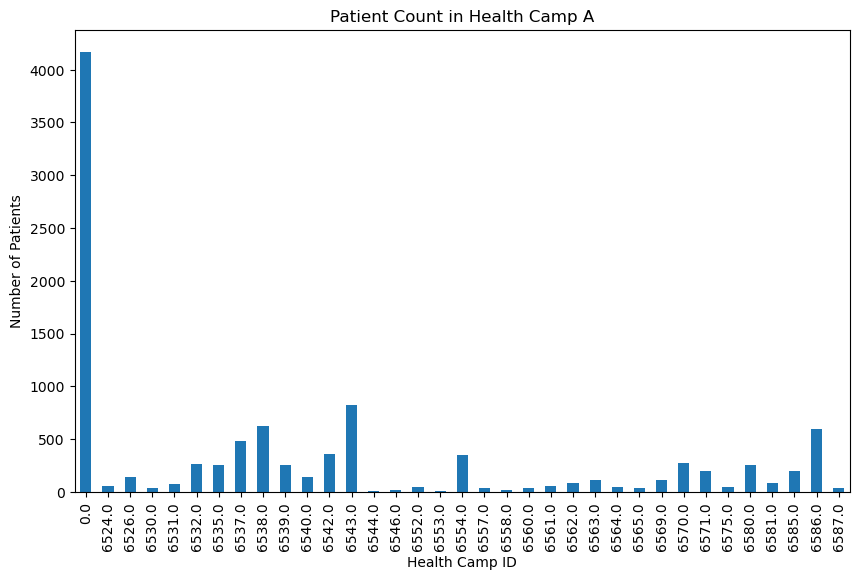

In [24]:
# Bar plot of patient count in health camp A
plt.figure(figsize=(10, 6))
patient_count_by_camp = merged_df.groupby('Health_Camp_ID_A')['Patient_ID'].nunique()
patient_count_by_camp.plot(kind='bar')
plt.title('Patient Count in Health Camp A')
plt.xlabel('Health Camp ID')
plt.ylabel('Number of Patients')
plt.show()

In [25]:
patient_count_by_camp

Health_Camp_ID_A
0.0       4168
6524.0      54
6526.0     140
6530.0      42
6531.0      79
6532.0     262
6535.0     252
6537.0     481
6538.0     625
6539.0     254
6540.0     140
6542.0     362
6543.0     826
6544.0      13
6546.0      18
6552.0      43
6553.0      11
6554.0     346
6557.0      36
6558.0      20
6560.0      41
6561.0      55
6562.0      89
6563.0     117
6564.0      49
6565.0      41
6569.0     112
6570.0     276
6571.0     195
6575.0      51
6580.0     260
6581.0      89
6585.0     203
6586.0     600
6587.0      36
Name: Patient_ID, dtype: int64

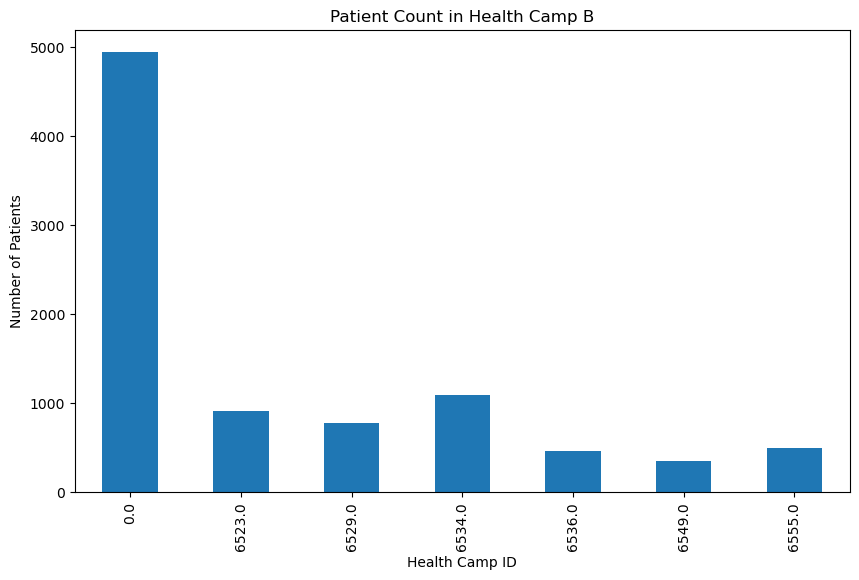

In [26]:
# Bar plot of patient count in health camp B
plt.figure(figsize=(10, 6))
patient_count_by_camp = merged_df.groupby('Health_Camp_ID_B')['Patient_ID'].nunique()
patient_count_by_camp.plot(kind='bar')
plt.title('Patient Count in Health Camp B')
plt.xlabel('Health Camp ID')
plt.ylabel('Number of Patients')
plt.show()

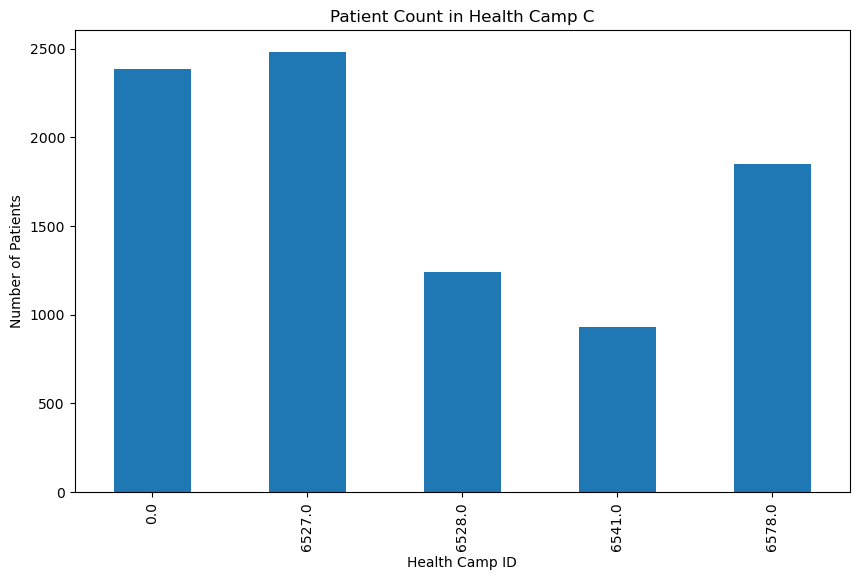

In [27]:
# Bar plot of patient count in health camp C
plt.figure(figsize=(10, 6))
patient_count_by_camp = merged_df.groupby('Health_Camp_ID_C')['Patient_ID'].nunique()
patient_count_by_camp.plot(kind='bar')
plt.title('Patient Count in Health Camp C')
plt.xlabel('Health Camp ID')
plt.ylabel('Number of Patients')
plt.show()

## 3. Donations and Health Scores Analysis

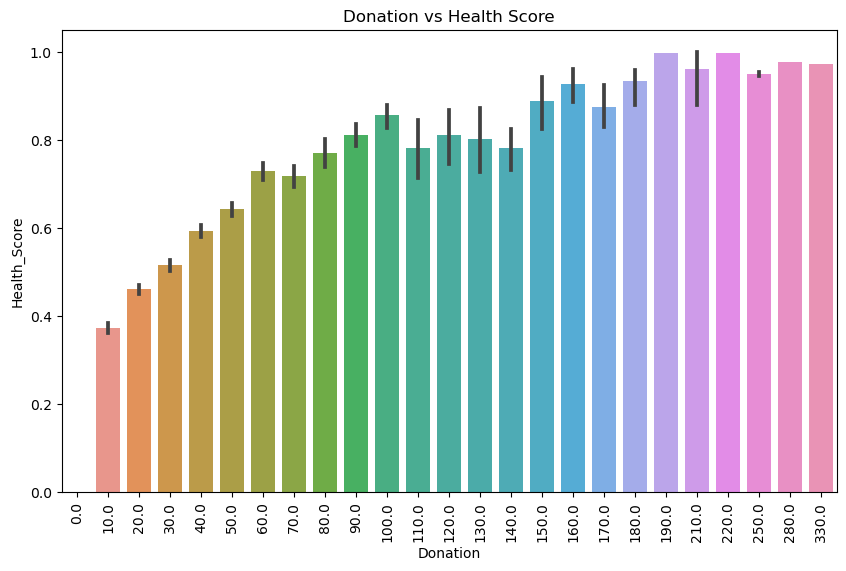

In [28]:
# Scatter plot of 'Donation' vs 'Health_Score'
plt.figure(figsize=(10, 6))
sns.barplot(x='Donation', y='Health_Score',data=merged_df)
plt.xticks(rotation=90)
plt.title('Donation vs Health Score')
plt.show()

## 4. Stall Visits Analysis

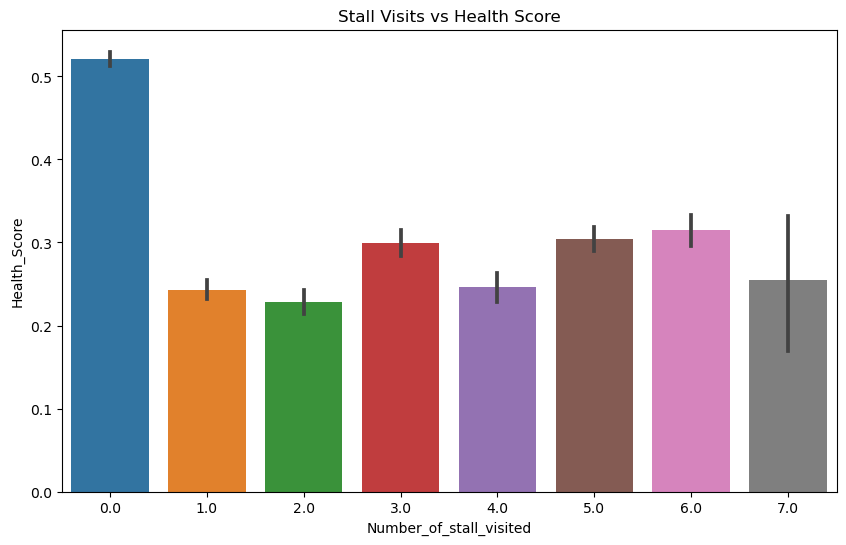

In [29]:
# Barplot of 'Number_of_stall_visited' vs 'Health_Score'
plt.figure(figsize=(10, 6))
sns.barplot(x='Number_of_stall_visited', y='Health_Score', data=merged_df)
plt.title('Stall Visits vs Health Score')
plt.show()

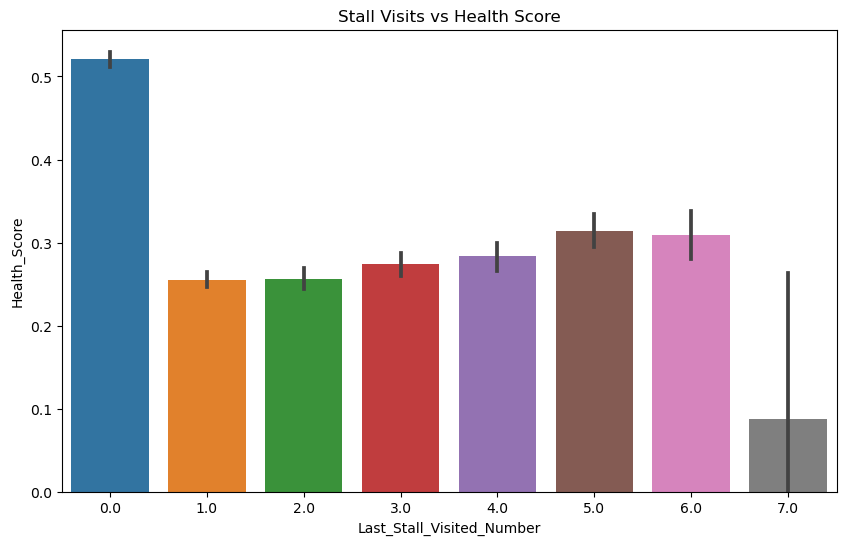

In [30]:
# Barplot of 'Last_Stall_Visited_Number' vs 'Health_Score'
plt.figure(figsize=(10, 6))
sns.barplot(x='Last_Stall_Visited_Number', y='Health_Score', data=merged_df)
plt.title('Stall Visits vs Health Score')
plt.show()

## 5. Health Score and Donation Distribution

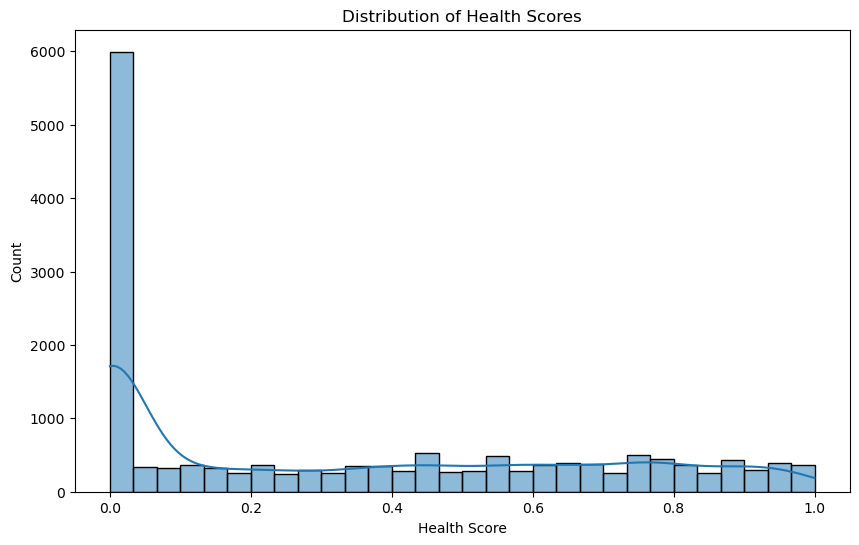

In [31]:
# Histogram of 'Health_Score'
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Health_Score'], bins=30, kde=True)
plt.title('Distribution of Health Scores')
plt.xlabel('Health Score')
plt.show()

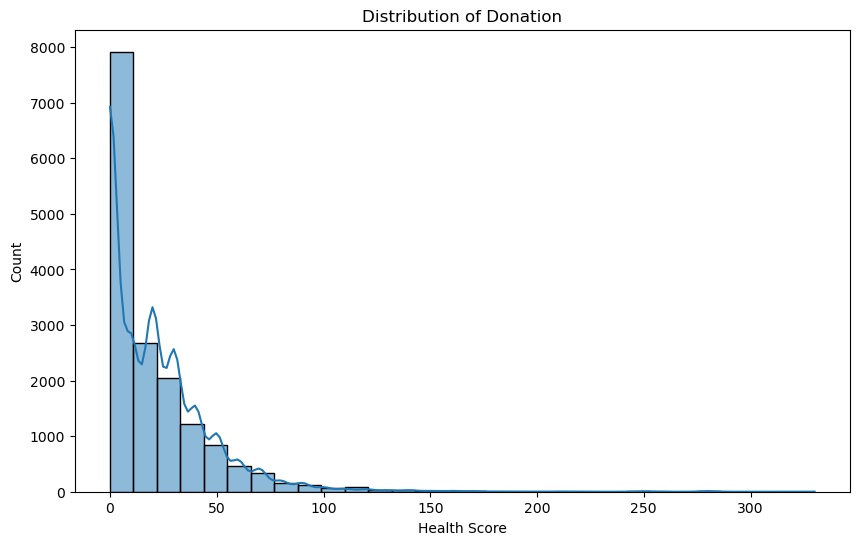

In [32]:
# Histogram of 'Donation'
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Donation'], bins=30, kde=True)
plt.title('Distribution of Donation')
plt.xlabel('Health Score')
plt.show()

## 6.Summary Statistics

In [33]:
summary_stats = merged_df[['Donation', 'Health_Score', 'Number_of_stall_visited','Last_Stall_Visited_Number']].describe()
print(summary_stats)

           Donation  Health_Score  Number_of_stall_visited  \
count  16026.000000  16026.000000             16026.000000   
mean      20.936603      0.334780                 2.311119   
std       25.470354      0.338872                 2.021055   
min        0.000000      0.000000                 0.000000   
25%        0.000000      0.000000                 0.000000   
50%       20.000000      0.241667                 2.000000   
75%       30.000000      0.639661                 4.000000   
max      330.000000      1.000000                 7.000000   

       Last_Stall_Visited_Number  
count               16026.000000  
mean                    1.872707  
std                     1.709920  
min                     0.000000  
25%                     0.000000  
50%                     1.000000  
75%                     3.000000  
max                     7.000000  


## 7. Correlation Analysis

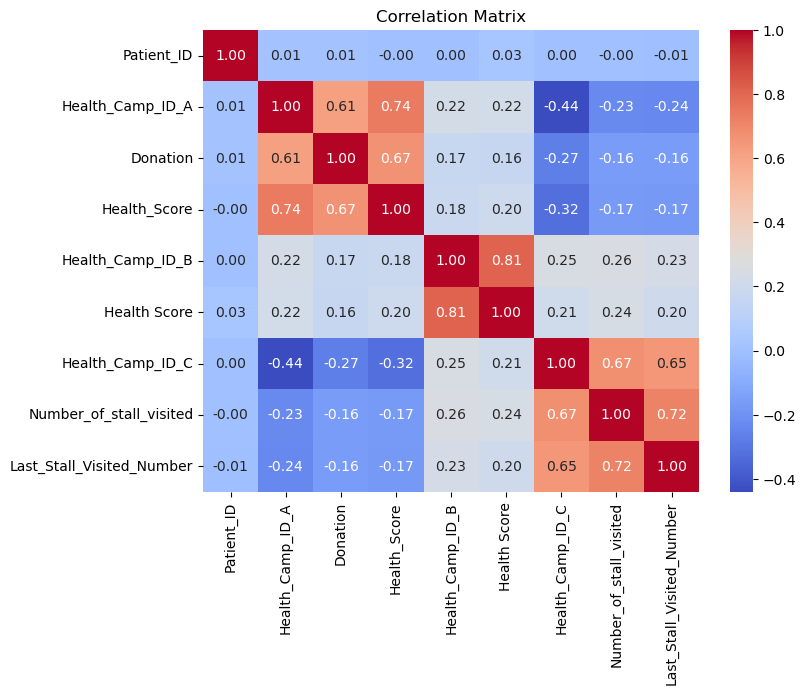

In [34]:
correlation_matrix = merged_df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

According to my analysis the ID's does not useful for model building, So I just neglecting it.

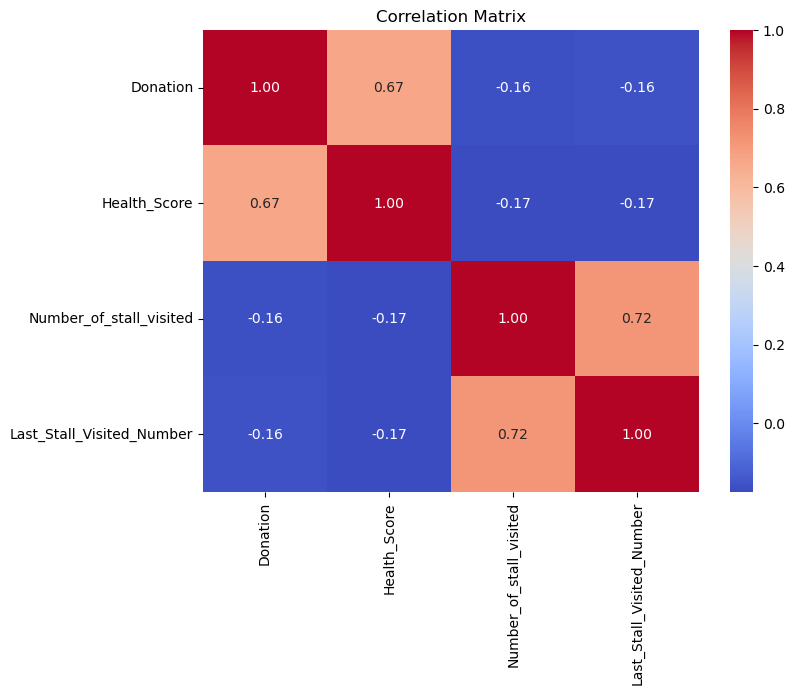

In [35]:
merged_df = merged_df[['Donation', 'Health_Score', 'Number_of_stall_visited','Last_Stall_Visited_Number']]
correlation_matrix = merged_df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Based on this correlation and perform other feature selection technique to select the feature for model building 

#### NOTE:

All of the analysis are made by own based on the problem statement.The analysis and reporting are quite change based on the problem statement and stakeholder requirements.

###### Prepared By,
Ahamed Basith